# Measurement of the Motion

In [146]:
from capillary import edge, fitting, analyse, display

## Meaning of data

### Meaning of Angles $\theta_i, \phi_i,\theta_{21}$
#### Original frame 72 of video 3

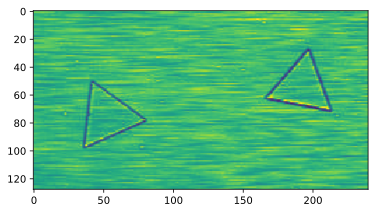

In [5]:
im=edge.R[3](72)
imshow(im);

In image processing, $x$ generally represents row number while $y$ represents column number. This caused a
$\pi/2$ rotation between the original image and the analysed result, i.e. $\theta\to\theta+\pi/2$. To go back to photos, angles should be minused by $\pi/2$. The conversion is **not** done in the Excel data.

#### Analysed frame

Processing video 3 frame 72:


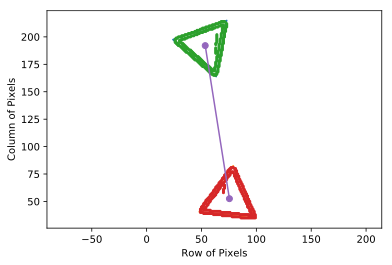

In [6]:
display.show_frame(3, 72);
xlabel('Row of Pixels');
ylabel('Column of Pixels');

If we use $\theta_{21}$ for the angle of vector distance $1\to 2$, and $\theta_{12}$  for $2\to 1$ (with period $2\pi$), then $\theta_{12}-\theta_{21}\equiv\pi$. The angle of $1,2$ is $\phi_1,\phi_2$ (with period $T=2\pi/3$). The angle relative to connecting line is
$$\begin{align}
\theta_1&=\phi_1-\theta_{21}+kT\\
\theta_2&=\phi_2-\theta_{12}+kT
\end{align}$$

<img src="https://raw.githubusercontent.com/peijunz/capillary/master/pos.png" width="20%"></img>
<img src="https://raw.githubusercontent.com/peijunz/capillary/master/position.png" width="50%"></img>

The data in excel is like this:

In [149]:
df.head()

,time,x1,y1,phi1,err1,x2,y2,phi2,err2,rho,theta21,theta1,theta2
Frame,,,,,,,,,,,,,
1,-196.933333,41.730093,159.569199,0.957273,1.826533,173.021676,42.032678,0.473448,1.740207,176.216666,-0.730175,-0.406948,0.156425
2,-196.866667,41.000302,159.493530,0.961015,1.748853,172.286890,42.337652,0.470001,1.702422,175.959279,-0.728582,-0.404798,0.151386
3,-196.800000,41.292929,160.064925,0.970592,1.692683,173.435318,42.436385,0.479468,1.737988,176.912646,-0.727355,-0.396448,0.159625
4,-196.733333,41.993180,159.312609,0.958889,1.690719,173.197404,41.772696,0.459726,1.731249,176.153852,-0.730520,-0.404986,0.143048
5,-196.666667,41.813606,159.518235,0.959954,1.751742,172.831972,42.302284,0.472667,1.677660,175.799293,-0.729853,-0.404588,0.155323


+ time is $t-t_\mathrm{contact}$ in unit of seconds.
+ All lengths ($x, y, \rho$) are in unit of pixels.
+ $(x_i, y_i)$ is centroid of triangle $i$
+ $\rho$ is displacement between two centroids.
+ err is fitting error, the smaller the better. Data with big error are discarded.
+ $\theta_i, \phi_i,\theta_{21}$ are explained above, their unit is radian

## Skipped frames
+ video 1: # Skip 3 seconds as there is a switching
+ video 3: # Skip 12 seconds as there is a shift of camera
+ video 4: # Skip 3 seconds as there is a bluring because of re-focusing?
+ video 7: # Skip 10 seconds as there is only thin edge, which are hard to detect.

In [143]:
analyse.to_excel(range(1,8))